In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyhere import here
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 


In [114]:
# help functions
# Density plot of data.
def plot_density(df, col_name):
    """
    Plots the density of a specified column in a DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - col_name (str): The name of the column to plot the density for.

    Returns:
    None

    This function calculates the mean and median of the specified column, then plots
    the density of the column using a histogram. It also adds vertical dashed lines at
    the mean and median values on the plot.
    """
    import matplotlib.pyplot as plt    
    mean_value = df[col_name].mean()
    median_value = df[col_name].median()
    plt.figure(figsize=(10, 6))
    df[col_name].plot(kind='density', title=f'Density Plot of {col_name}')
    plt.axvline(mean_value, color='r', linestyle='--', label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='g', linestyle='-', label=f'Median: {median_value:.2f}')
    plt.xlabel(col_name)
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

    
def plot_akde(df, col_name, title = None):
    """
    Plots the Akaike Information Criterion Density Estimation (AKDE) for a given column in a DataFrame.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the data.
    col_name (str): The name of the column to plot the AKDE for.
    title (str, optional): The title of the plot. Defaults to None.

    Returns:
    None
    """
    # using akde
    import matplotlib.pyplot as plt
    from akde import akde
    pdf, meshgrids, bandwith = akde(df[col_name].to_numpy().reshape(-1,1).astype(np.float64))
    pdf = pdf.reshape(meshgrids[0].shape)

    # Plot the density estimation, true distribution, and histogram
    plt.figure(figsize=(8, 5))
    plt.plot(meshgrids[0], pdf, label="AKDE", color='blue', linewidth=2)
    plt.xlabel("X")
    plt.ylabel("Density")
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()
    
    # create a list that keeps track of which column number is next for EDA
def make_column_tracker(df):
    """
    Creates a column tracker function for a given DataFrame.

    This function returns a wrapper function that keeps track of the next column
    index to be processed in the DataFrame. It ensures that each column is processed
    only once and provides a mechanism to check if all columns have been processed.

    Parameters:
    df (pandas.DataFrame): The DataFrame for which the column tracker is created.

    Returns:
    function: A wrapper function that returns the next column index to be processed.
              If all columns have been processed, it prints a message and returns None.

    Example:
    >>> import pandas as pd
    >>> df = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
    >>> tracker = make_column_tracker(df)
    >>> tracker()
    1
    >>> tracker()
    2
    >>> tracker()
    All columns have been processed
    None
    """    
    minimum = -0.1
    maximum = len(df.columns)
    next_column = 1
    def wrapper():
        nonlocal next_column
        if next_column >= maximum:
            print('All columns have been processed')
            return None
        elif next_column < minimum:
            print('Column number should be greater than 0')
            return None
        else:
            return_value = next_column
            next_column += 1
            return return_value
    def display_internals():
        print(f'next_column: {next_column}')
        print(f'minimum: {minimum}')
        print(f'maximum: {maximum}')
    wrapper.display_internals = display_internals
    return wrapper

# create a function for printing the start of the EDA for a column
def print_eda_start(df, col_number):
    """
    Prints the start of the EDA for a specified column in a DataFrame.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the data.
    col_number (int): The index of the column to be processed.

    Returns:
    int: The next column index to be processed.

    This function prints the title and description of the EDA for the specified column,
    then returns the next column index to be processed. If all columns have been processed,
    it prints a message and returns None.
    """
    from IPython.display import Markdown, display
    if col_number == None:
        # print('All columns have been processed.')
        return None
    col_name = df.columns[col_number]
    description = ''
    # check if col_name in key of metadata
    if 'metadata' in df.attrs and col_name in df.attrs['metadata']:
        description = df.attrs['metadata'][col_name]
    else:
        description = 'No description available'
    
    meta_data = df.attrs['metadata'][df.columns[col_number]] if 'metadata' in df.attrs and df.columns[col_number] in df.attrs['metadata'] else ''
    text = f"### EDA for **{col_name}** - ({col_number}/{len(df.columns) - 1}) \n #### {description}"    
    display(Markdown(text))
    return df.columns[col_number]
    

In [7]:
# metadata 
# print(heart_disease.metadata) 
heart_disease.metadata.keys()

dict_keys(['uci_id', 'name', 'repository_url', 'data_url', 'abstract', 'area', 'tasks', 'characteristics', 'num_instances', 'num_features', 'feature_types', 'demographics', 'target_col', 'index_col', 'has_missing_values', 'missing_values_symbol', 'year_of_dataset_creation', 'last_updated', 'dataset_doi', 'creators', 'intro_paper', 'additional_info'])

In [3]:
# variable information 
print(heart_disease.variables) 

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [21]:
# heart_disease.variables['description']
var_names = heart_disease.variables['name']
var_descriptions = heart_disease.variables['description']
name_desc_dict = dict(zip(var_names, var_descriptions))
print(name_desc_dict)

{'age': None, 'sex': None, 'cp': None, 'trestbps': 'resting blood pressure (on admission to the hospital)', 'chol': 'serum cholestoral', 'fbs': 'fasting blood sugar > 120 mg/dl', 'restecg': None, 'thalach': 'maximum heart rate achieved', 'exang': 'exercise induced angina', 'oldpeak': 'ST depression induced by exercise relative to rest', 'slope': None, 'ca': 'number of major vessels (0-3) colored by flourosopy', 'thal': None, 'num': 'diagnosis of heart disease'}


In [ ]:
# adding metadata to the dataframe 
X.attrs['metadata'] = name_desc_dict

In [22]:
# create a new y1 and dichotomize the target
y1 = np.where(y == 0, 0, 1)
y1[:10]

array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1]])

In [29]:
next_col = make_column_tracker(X)

In [30]:
col_name = print_eda_start(X, col_number = next_col())

### EDA for **sex** - (1/12) 
 #### None

In [31]:
X[col_name].describe()

count    303.000000
mean       0.679868
std        0.467299
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64

In [35]:
X[col_name].value_counts().to_frame(name='count').assign(prop=lambda x: x['count'] / sum(x['count']))

,count,prop
sex,,
1,206,0.679868
0,97,0.320132


Presumably 1 is male and 0 is female. Therefore there are 68% male vs 32% female.

In [37]:
col_name = print_eda_start(X, col_number = next_col())

### EDA for **cp** - (2/12) 
 #### None

In [38]:
X[col_name]

0      1
1      4
2      4
3      3
4      2
      ..
298    1
299    4
300    4
301    2
302    3
Name: cp, Length: 303, dtype: int64

 **cp:** chest pain type
- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic

Above from [Heart Disease - UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/45/heart+disease)

In [62]:
X[col_name].value_counts().to_frame(name='count').assign(prop=lambda x: x['count'] / sum(x['count']))

,count,prop
cp,,
4,144,0.475248
3,86,0.283828
2,50,0.165017
1,23,0.075908


In [52]:
# X-tick labels
x_labels = ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']
x_labels.reverse()
x_labels


['asymptomatic', 'non-anginal pain', 'atypical angina', 'typical angina']

<Axes: title={'center': 'Chest Pain Type Distribution'}, xlabel='Chest Pain Type', ylabel='Count'>

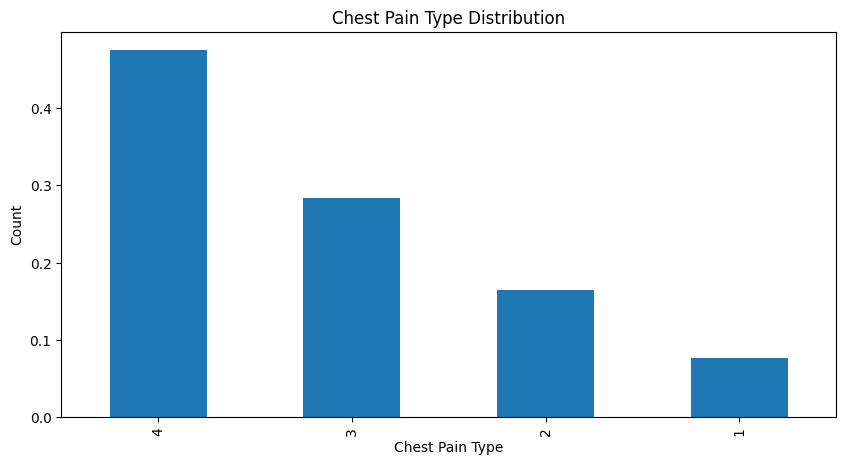

In [61]:
X[col_name].value_counts(normalize=True).plot(kind='bar', figsize=(10, 5), title='Chest Pain Type Distribution', xlabel='Chest Pain Type', ylabel='Count')

Majority of patients are asymptomatic.

In [63]:
col_name = print_eda_start(X, col_number = next_col())

### EDA for **trestbps** - (3/12) 
 #### resting blood pressure (on admission to the hospital)

In [64]:
X[col_name]

0      145
1      160
2      120
3      130
4      130
      ... 
298    110
299    144
300    130
301    130
302    138
Name: trestbps, Length: 303, dtype: int64

In [65]:
X[col_name].describe()

count    303.000000
mean     131.689769
std       17.599748
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

Mean resting systolic blood pressure is 131.7 and median is 130.

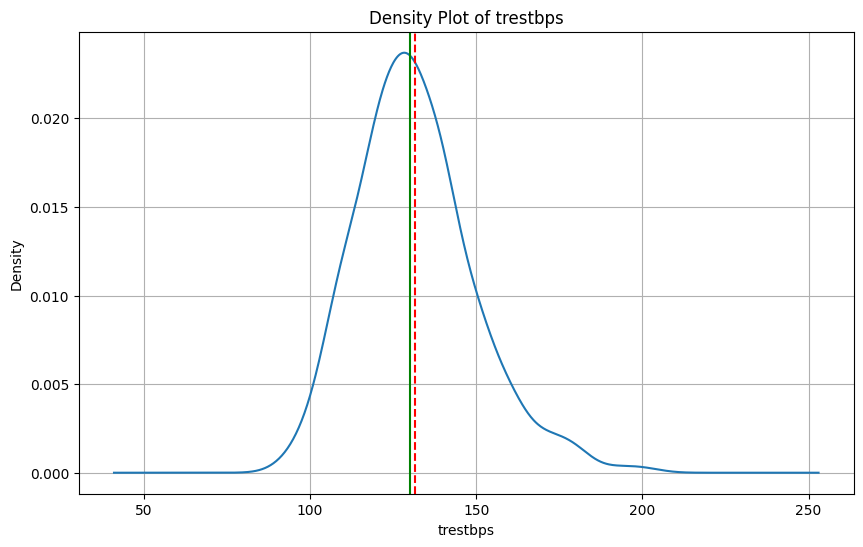

In [68]:
plot_density(X, col_name)

Symmetric density plot.

In [69]:
col_name = print_eda_start(X, col_number = next_col())

### EDA for **chol** - (4/12) 
 #### serum cholestoral

In [70]:
X[col_name]

0      233
1      286
2      229
3      250
4      204
      ... 
298    264
299    193
300    131
301    236
302    175
Name: chol, Length: 303, dtype: int64

In [71]:
X[col_name].describe()

count    303.000000
mean     246.693069
std       51.776918
min      126.000000
25%      211.000000
50%      241.000000
75%      275.000000
max      564.000000
Name: chol, dtype: float64

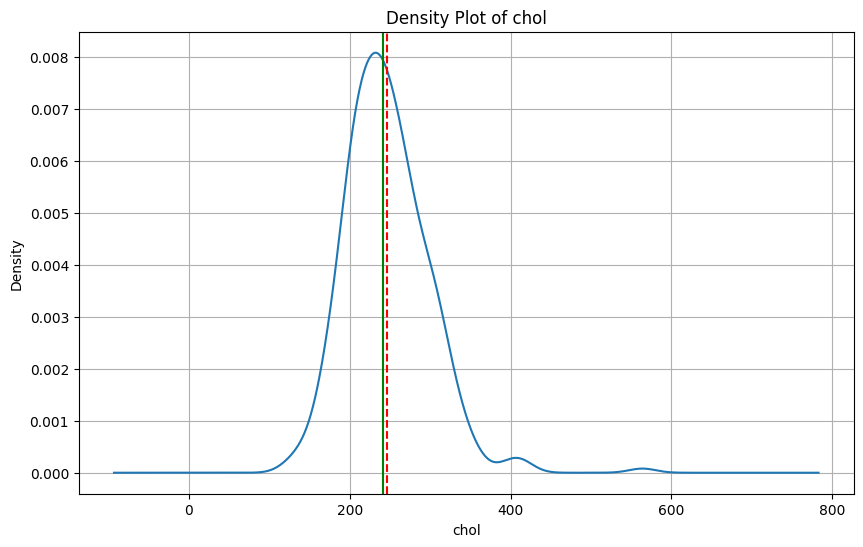

In [72]:
plot_density(X, col_name)

Symmetric plot of serum cholesterol.

In [73]:
col_name = print_eda_start(X, col_number = next_col())

### EDA for **fbs** - (5/12) 
 #### fasting blood sugar > 120 mg/dl

In [74]:
X[col_name]

0      1
1      0
2      0
3      0
4      0
      ..
298    0
299    1
300    0
301    0
302    0
Name: fbs, Length: 303, dtype: int64

In [76]:
# binary variable
X[col_name].value_counts(normalize=True).round(2) * 100


fbs
0    85.0
1    15.0
Name: proportion, dtype: float64

Most patients are not diabetic.

In [77]:
col_name = print_eda_start(X, col_number = next_col())

### EDA for **restecg** - (6/12) 
 #### None

In [78]:
X[col_name]

0      2
1      2
2      2
3      0
4      2
      ..
298    0
299    0
300    0
301    2
302    0
Name: restecg, Length: 303, dtype: int64

In [79]:
X[col_name].value_counts(normalize=True).round(2) * 100

restecg
0    50.0
2    49.0
1     1.0
Name: proportion, dtype: float64

restecg: resting electrocardiographic results
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

In [80]:
col_name = print_eda_start(X, col_number = next_col())

### EDA for **thalach** - (7/12) 
 #### maximum heart rate achieved

In [81]:
X[col_name]

0      150
1      108
2      129
3      187
4      172
      ... 
298    132
299    141
300    115
301    174
302    173
Name: thalach, Length: 303, dtype: int64

In [82]:
X[col_name].describe()

count    303.000000
mean     149.607261
std       22.875003
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

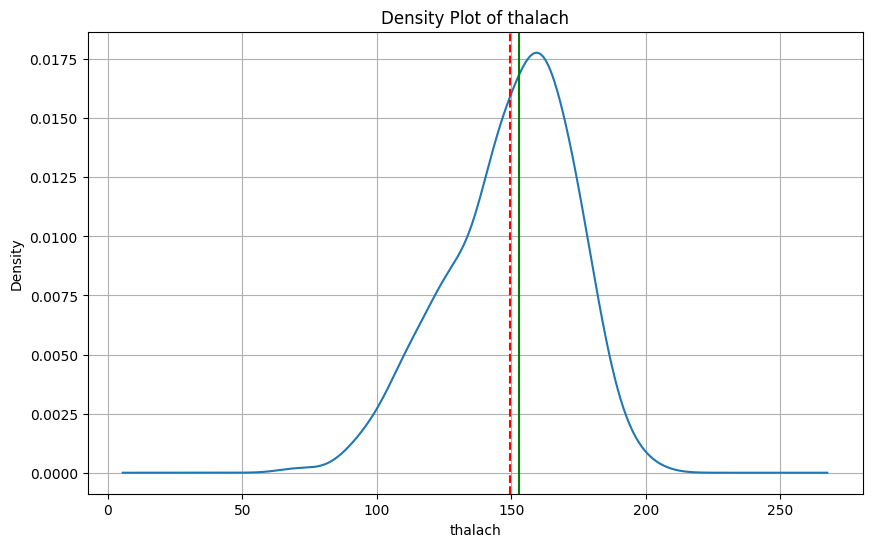

In [83]:
plot_density(X, col_name)

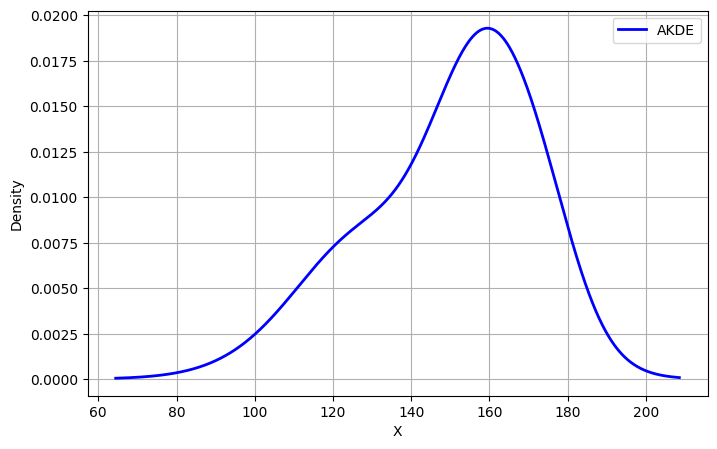

In [84]:
plot_akde(X, col_name)

In [85]:
col_name = print_eda_start(X, col_number = next_col())

### EDA for **exang** - (8/12) 
 #### exercise induced angina

In [86]:
X[col_name]

0      0
1      1
2      1
3      0
4      0
      ..
298    0
299    0
300    1
301    0
302    0
Name: exang, Length: 303, dtype: int64

In [90]:
X[col_name].value_counts().to_frame(name='count').assign(prop=lambda x: x['count'] / sum(x['count']))

,count,prop
exang,,
0,204,0.673267
1,99,0.326733


In [91]:
col_name = print_eda_start(X, col_number = next_col())

### EDA for **oldpeak** - (9/12) 
 #### ST depression induced by exercise relative to rest

In [93]:
X[col_name]

0      2.3
1      1.5
2      2.6
3      3.5
4      1.4
      ... 
298    1.2
299    3.4
300    1.2
301    0.0
302    0.0
Name: oldpeak, Length: 303, dtype: float64

In [94]:
X[col_name].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

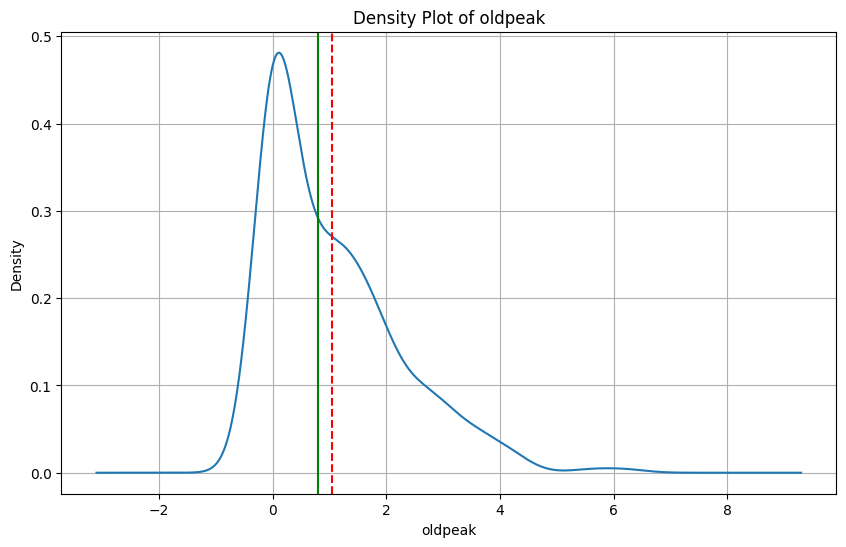

In [95]:
plot_density(X, col_name)

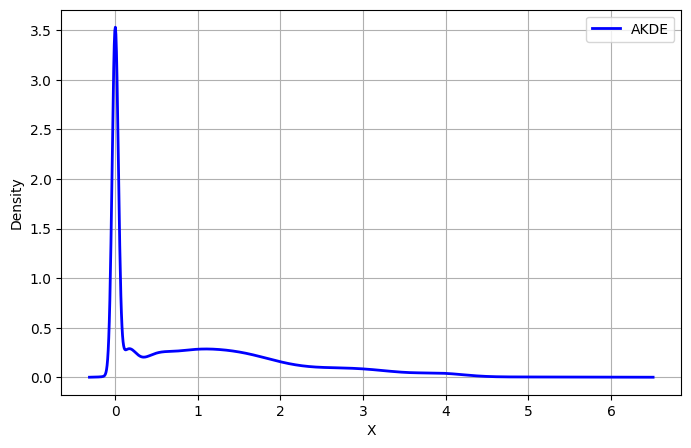

In [96]:
plot_akde(X, col_name)

In [97]:
col_name = print_eda_start(X, col_number = next_col())

### EDA for **slope** - (10/12) 
 #### None

In [98]:
X[col_name]

0      3
1      2
2      2
3      3
4      1
      ..
298    2
299    2
300    2
301    2
302    1
Name: slope, Length: 303, dtype: int64

slope: the slope of the peak exercise ST segment
- Value 1: upsloping
- Value 2: flat
- Value 3: downsloping

In [100]:
X[col_name].value_counts().to_frame(name='count').assign(prop=lambda x: x['count'] / sum(x['count']))

,count,prop
slope,,
1,142,0.468647
2,140,0.462046
3,21,0.069307


In [101]:
col_name = print_eda_start(X, col_number = next_col())

### EDA for **ca** - (11/12) 
 #### number of major vessels (0-3) colored by flourosopy

In [102]:
X[col_name]

0      0.0
1      3.0
2      2.0
3      0.0
4      0.0
      ... 
298    0.0
299    2.0
300    1.0
301    1.0
302    NaN
Name: ca, Length: 303, dtype: float64

In [103]:
X[col_name].value_counts()

ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64

In [104]:
X[col_name].value_counts().to_frame(name='count').assign(prop=lambda x: x['count'] / sum(x['count']))

,count,prop
ca,,
0.0,176,0.588629
1.0,65,0.217391
2.0,38,0.127090
3.0,20,0.066890


In [105]:
col_name = print_eda_start(X, col_number = next_col())

### EDA for **thal** - (12/12) 
 #### None

In [106]:
X[col_name]

0      6.0
1      3.0
2      7.0
3      3.0
4      3.0
      ... 
298    7.0
299    7.0
300    7.0
301    3.0
302    3.0
Name: thal, Length: 303, dtype: float64

thal: 
- 3 = normal
- 6 = fixed defect
- 7 = reversable defect

In [107]:
X[col_name].value_counts()

thal
3.0    166
7.0    117
6.0     18
Name: count, dtype: int64

In [108]:
X[col_name].value_counts().to_frame(name='count').assign(prop=lambda x: x['count'] / sum(x['count']))

,count,prop
thal,,
3.0,166,0.551495
7.0,117,0.388704
6.0,18,0.059801


In [113]:
col_name = print_eda_start(X, col_number = next_col())

All columns have been processed
All columns have been processed.


In [117]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [139]:
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

In [ ]:
# X_filled_na = X.apply(lambda x: x.fillna(x.mode(x.mode()[0])))

In [23]:
def fill_na_with_mode(series):
    """Fills NaN values in a pandas Series with its mode.

    If the Series is entirely NaN or has no mode, it remains unchanged.
    """
    if series.isnull().all(): # Handle cases where the entire column is NaN
        return series
    # Calculate mode - mode() returns a Series, handle potential empty result
    mode_val = series.mode()
    if not mode_val.empty:
        return series.fillna(mode_val[0])
    else: # Handle cases with no mode (e.g., unique floats) - though less common for mode imputation
        return series

In [24]:
X_filled_na = X.apply(fill_na_with_mode)

In [25]:
X_filled_na.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [26]:
np.isnan(y1).sum()

np.int64(0)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_filled_na, y1, test_size=0.3, random_state=42)

In [28]:
# Assuming X_train, X_test, y_train, y_test are already defined
dataframes = [X_train, X_test, y_train, y_test]

# Using a functional style with map and lambda
list(map(lambda df: print(f"{[k for k, v in globals().items() if v is df][0]}: {df.shape}"), dataframes))


X_train: (212, 13)
X_test: (91, 13)
y_train: (212, 1)
y_test: (91, 1)


[None, None, None, None]

In [29]:
# 2. Model Building and Training
model = GaussianNB()
model.fit(X_train, y_train.ravel())  # ravel to avoid DataConversionWarning


GaussianNB()

In [30]:
# 3. Prediction and Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.7912087912087912
              precision    recall  f1-score   support

           0       0.82      0.77      0.80        48
           1       0.76      0.81      0.79        43

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91



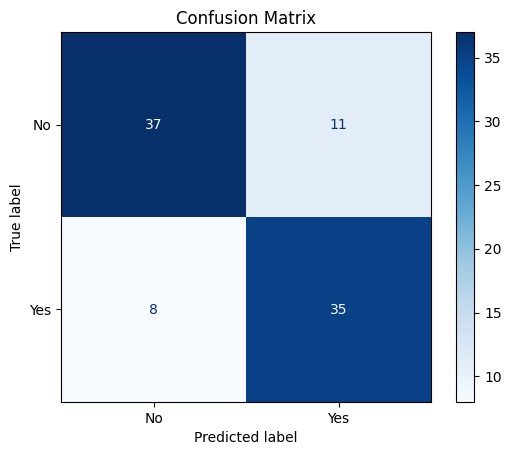

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
# Use model.classes_ to ensure the labels (0 and 1) are displayed correctly
display_labels = ["No", "Yes"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=plt.cm.Blues) # You can choose different color maps like 'viridis', 'plasma', etc.
plt.title('Confusion Matrix')
plt.show()


In [39]:
def out(x: np.ndarray, value: int) -> None:
    print(f'Total for {value} = {(x == value).sum()}')

list(map(lambda num: out(y_test, num), [0, 1]))

Total for 0 = 48
Total for 1 = 43


[None, None]

## Logistic regression

Logistic Regression Accuracy: 0.8571

Classification Report:
              precision    recall  f1-score   support

          No       0.89      0.83      0.86        48
         Yes       0.83      0.88      0.85        43

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91

Confusion Matrix:


/Users/vincent/Programming/python/Python-Machine-Learning-by-Example-Fourth-Edition/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


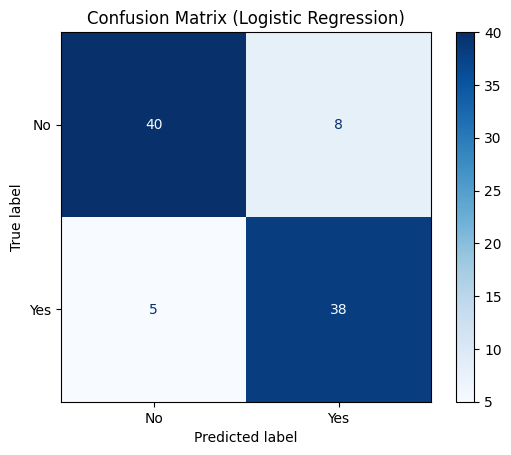

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Initialize the Logistic Regression model
# You can adjust parameters like 'solver', 'C', 'max_iter' if needed
log_reg_model = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter for convergence

# 2. Train the model
# Use y_train.ravel() to ensure y_train is a 1D array
log_reg_model.fit(X_train, y_train.ravel())

# 3. Make predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# 4. Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg, target_names=['No', 'Yes']))

# 5. Display the Confusion Matrix
print("Confusion Matrix:")
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=['No', 'Yes'])
disp_log_reg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()


Logistic Regression Accuracy (Scaled Data): 0.8462

Classification Report (Scaled Data):
              precision    recall  f1-score   support

          No       0.89      0.81      0.85        48
         Yes       0.81      0.88      0.84        43

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91

Confusion Matrix (Scaled Data):


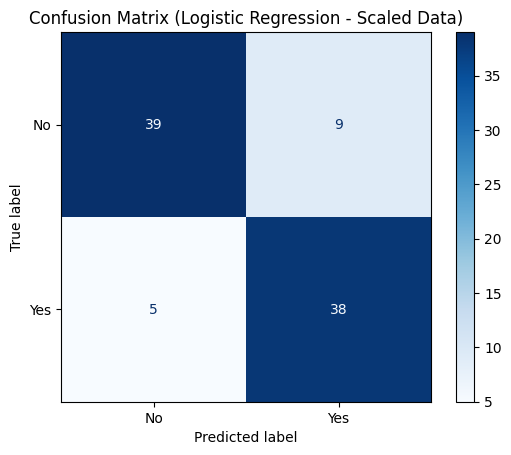

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler # Import StandardScaler
import matplotlib.pyplot as plt

# 1. Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Fit on training data and transform it
X_test_scaled = scaler.transform(X_test)     # Transform test data using the same scaler

# 2. Initialize the Logistic Regression model
# You might even be able to reduce max_iter now, but 1000 is fine
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# 3. Train the model using the SCALED training data
log_reg_model.fit(X_train_scaled, y_train.ravel())

# 4. Make predictions on the SCALED test set
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

# 5. Evaluate the model (using original y_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy (Scaled Data): {accuracy_log_reg:.4f}\n") # Updated print statement

print("Classification Report (Scaled Data):")
print(classification_report(y_test, y_pred_log_reg, target_names=['No', 'Yes']))

# 6. Display the Confusion Matrix
print("Confusion Matrix (Scaled Data):")
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=['No', 'Yes'])
disp_log_reg.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Logistic Regression - Scaled Data)')
plt.show()
